In [30]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [31]:
from ucimlrepo import fetch_ucirepo 


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#this dataset has 286 instances and the instances are described by 9 attributes
data = pd.read_csv('C:\\Users\\megha\\OneDrive\\Desktop\\breast+cancer2.zip')

In [34]:
data.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [35]:
data.shape

(285, 10)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,auc

In [37]:
# Extracting the target variable, we will drop one column from X and assign it to y
X = data.drop('no.1', axis=1)
y = data['no.1']


In [38]:
# It identifies which columns in X contain categorical variables by selecting those with data type 'object'.
# Then OrdinalEncoder object, which will be used to transform the categorical variables into ordinal integers.
#Finally, the transformed ordinal integer values are assigned back to the original categorical columns in X.

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
X[categorical_cols] = ordinal_encoder.fit_transform(X[categorical_cols])

In [39]:
#Taking 20% of data into test set for validation and 80% of data into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low
0,0.0,2.0,2.0,3.0,0.0,1.0,2,1.0,5.0
1,0.0,2.0,2.0,3.0,0.0,1.0,2,0.0,2.0
2,0.0,4.0,0.0,2.0,0.0,1.0,2,1.0,3.0
3,0.0,2.0,2.0,0.0,0.0,1.0,2,1.0,4.0
4,0.0,4.0,0.0,2.0,0.0,1.0,2,0.0,2.0


In [41]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: no.1, dtype: object

In [42]:
#Identifying the columns with missing variables
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test = X_test.drop(cols_with_missing, axis=1)

In [43]:
#using standard scalar to standardize the features of a dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(reduced_X_train)
X_test_scaled = scaler.transform(reduced_X_test)

In [44]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [45]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


In [47]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)


In [48]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

In [49]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
predictions = [lr_pred, dt_pred, rf_pred, svm_pred, knn_pred]

In [50]:
#Evaluating the performance of the model by computing various classification metrics 

for i, pred in enumerate(predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    print(f"{models[i]}: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}, F1-score = {f1}")

Logistic Regression: Accuracy = 0.7368421052631579, Precision = 0.6809425524595805, Recall = 0.7368421052631579, F1-score = 0.7049248348281255
Decision Tree: Accuracy = 0.7192982456140351, Precision = 0.738007606428659, Recall = 0.7192982456140351, F1-score = 0.7278752436647173
Random Forest: Accuracy = 0.7543859649122807, Precision = 0.7368421052631579, Recall = 0.7543859649122807, F1-score = 0.7447181784247853
SVM: Accuracy = 0.8070175438596491, Precision = 0.8004852556924225, Recall = 0.8070175438596491, F1-score = 0.8034602635621312
KNN: Accuracy = 0.8421052631578947, Precision = 0.8369540873460246, Recall = 0.8421052631578947, F1-score = 0.8391947610962891


SVM AUC: 0.6956521739130436


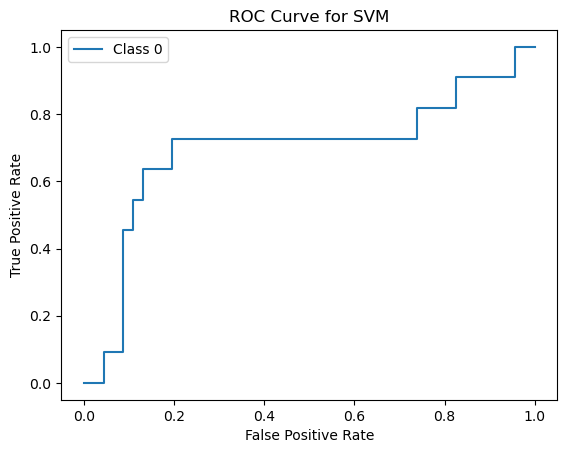

In [51]:
svm_probs = svm_model.predict_proba(X_test_scaled)
svm_probs = svm_probs[:, 1]
svm_probs_reshaped = svm_probs.reshape(-1, 1)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=['no','yes'])
classes = ['no','yes']

svm_auc = roc_auc_score(y_test_bin, svm_probs_reshaped, multi_class='ovr')

print(f"SVM AUC: {svm_auc}")

# Computing ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_test_bin.shape[1]  # Number of classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], svm_probs)



# Plot ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

In [52]:
print(np.sum(svm_probs, axis=0))

14.626157008752989


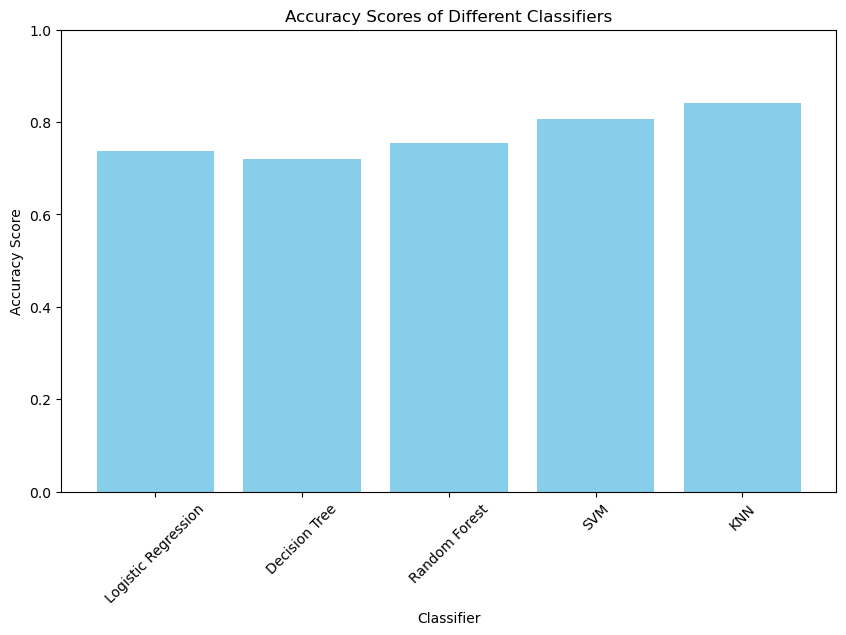

In [53]:
# Accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, pred) for pred in predictions]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1
plt.show()


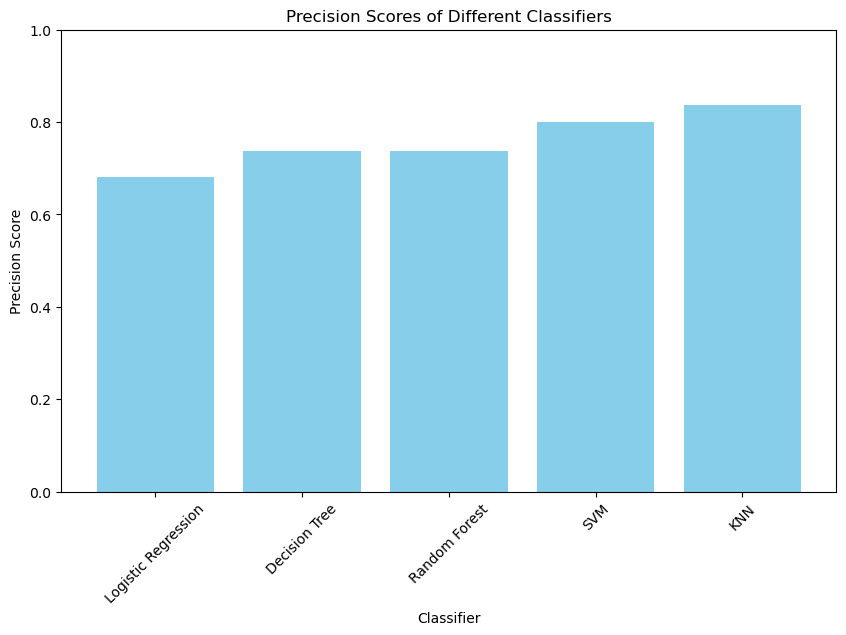

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Precision scores for each model
precision_scores = [precision_score(y_test, pred, average='weighted') for pred in predictions]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Precision Score')
plt.title('Precision Scores of Different Classifiers')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1
plt.show()


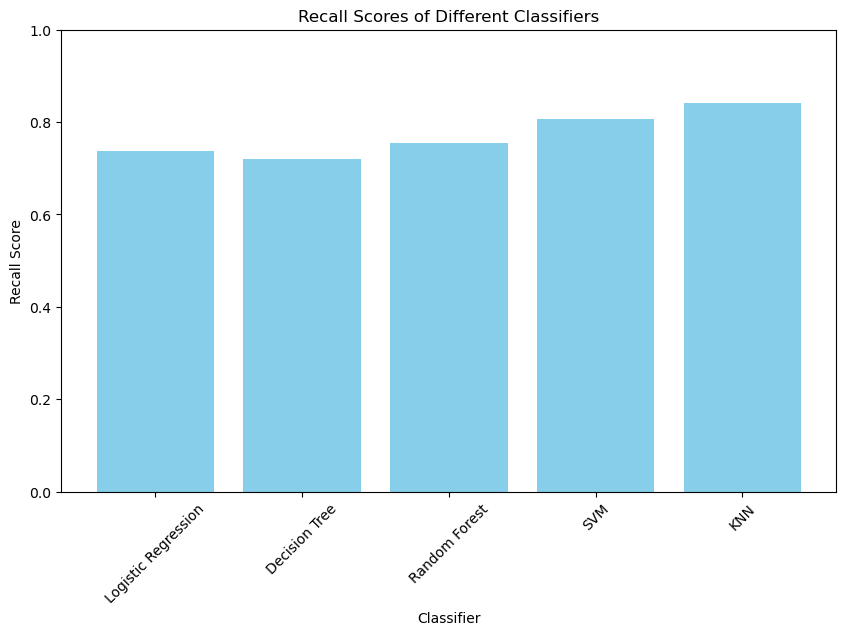

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Recall scores for each model
recall_scores = [recall_score(y_test, pred, average='weighted') for pred in predictions]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, recall_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Recall Score')
plt.title('Recall Scores of Different Classifiers')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1
plt.show()


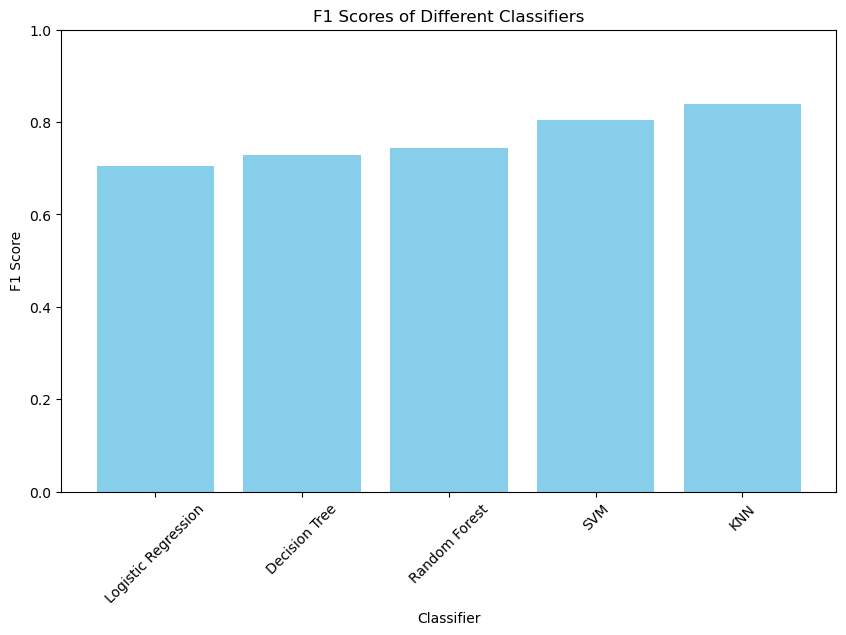

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# F1 scores for each model
f1_scores = [f1_score(y_test, pred, average='weighted') for pred in predictions]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Classifiers')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Setting y-axis limits from 0 to 1
plt.show()


In [57]:
#KNN classifier has better performance comparitively